In [1]:
import wget

In [2]:
from pip._internal import main
main(['install', 'wget'])
import wget

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
try:
    import wget
except:
    import pip
    pip.main(['install', 'wget'])
    import wget

In [4]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
try:
    import pandas_datareader.data as web
except:
    from pip._internal import main
    main(['install', 'pandas_datareader'])
    import pandas_datareader.data as web

In [5]:
style.use('ggplot')

In [6]:
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2016, 12, 31)

In [7]:
class YahooDailyReader():
    
    def __init__(self, symbol=None, start=None, end=None):
        import datetime, time
        self.symbol = symbol
        
        # initialize start/end dates if not provided
        if end is None:
            end = datetime.datetime.today()
        if start is None:
            start = datetime.datetime(2010,1,1)
        
        self.start = start
        self.end = end
        
        # convert dates to unix time strings
        unix_start = int(time.mktime(self.start.timetuple()))
        day_end = self.end.replace(hour=23, minute=59, second=59)
        unix_end = int(time.mktime(day_end.timetuple()))
        
        url = 'https://finance.yahoo.com/quote/{}/history?'
        url += 'period1={}&period2={}'
        url += '&filter=history'
        url += '&interval=1d'
        url += '&frequency=1d'
        self.url = url.format(self.symbol, unix_start, unix_end)
        
    def read(self):
        import requests, re, json
       
        r = requests.get(self.url)
        
        ptrn = r'root\.App\.main = (.*?);\n}\(this\)\);'
        txt = re.search(ptrn, r.text, re.DOTALL).group(1)
        jsn = json.loads(txt)
        df = pd.DataFrame(
                jsn['context']['dispatcher']['stores']
                ['HistoricalPriceStore']['prices']
                )
        df.insert(0, 'symbol', self.symbol)
        df['date'] = pd.to_datetime(df['date'], unit='s').dt.date
        
        # drop rows that aren't prices
        df = df.dropna(subset=['close'])
        
        df = df[['symbol', 'date', 'high', 'low', 'open', 'close', 
                 'volume', 'adjclose']]
        df = df.set_index('symbol')
        return df

In [8]:
ydr = YahooDailyReader('TSLA')
df = ydr.read()

In [9]:
print(df.head(6))

              date        high         low        open       close    volume  \
symbol                                                                         
TSLA    2018-10-23  293.994995  262.100006  263.869995  293.589996  13973395   
TSLA    2018-10-22  261.859985  252.589996  260.679993  260.950012   5597600   
TSLA    2018-10-19  269.660004  253.500000  267.390015  260.000000   9375500   
TSLA    2018-10-18  271.000000  263.000000  269.290009  263.910004   5421200   
TSLA    2018-10-17  282.700012  265.799988  282.399994  271.779999   8655500   
TSLA    2018-10-16  277.380005  262.239990  265.700012  276.589996   9526400   

          adjclose  
symbol              
TSLA    293.589996  
TSLA    260.950012  
TSLA    260.000000  
TSLA    263.910004  
TSLA    271.779999  
TSLA    276.589996  


In [10]:
print(df['open'][0:5])

symbol
TSLA    263.869995
TSLA    260.679993
TSLA    267.390015
TSLA    269.290009
TSLA    282.399994
Name: open, dtype: float64


In [11]:
df.to_csv('tesla.csv')

In [12]:
df = pd.read_csv('tesla.csv')

In [13]:
print(df.head())

  symbol        date        high         low        open       close  \
0   TSLA  2018-10-23  293.994995  262.100006  263.869995  293.589996   
1   TSLA  2018-10-22  261.859985  252.589996  260.679993  260.950012   
2   TSLA  2018-10-19  269.660004  253.500000  267.390015  260.000000   
3   TSLA  2018-10-18  271.000000  263.000000  269.290009  263.910004   
4   TSLA  2018-10-17  282.700012  265.799988  282.399994  271.779999   

     volume    adjclose  
0  13973395  293.589996  
1   5597600  260.950012  
2   9375500  260.000000  
3   5421200  263.910004  
4   8655500  271.779999  


In [14]:
df = pd.read_csv('tesla.csv', parse_dates = True, index_col = 0)

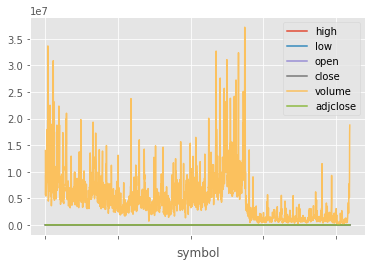

In [15]:
df.plot()
plt.show()

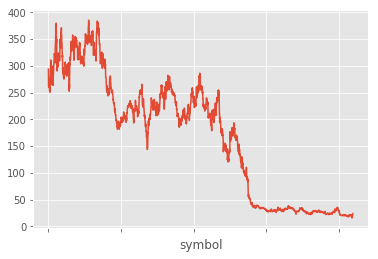

In [16]:
df['adjclose'].plot()
plt.show()

In [17]:
print(df['adjclose'])

symbol
TSLA    293.589996
TSLA    260.950012
TSLA    260.000000
TSLA    263.910004
TSLA    271.779999
TSLA    276.589996
TSLA    259.589996
TSLA    258.779999
TSLA    252.229996
TSLA    256.880005
TSLA    262.799988
TSLA    250.559998
TSLA    261.950012
TSLA    281.829987
TSLA    294.799988
TSLA    301.019989
TSLA    310.700012
TSLA    264.769989
TSLA    307.519989
TSLA    309.579987
TSLA    300.989990
TSLA    299.679993
TSLA    299.100006
TSLA    298.329987
TSLA    299.019989
TSLA    284.959991
TSLA    294.839996
TSLA    295.200012
TSLA    289.459991
TSLA    290.540009
           ...    
TSLA     19.030001
TSLA     19.600000
TSLA     19.590000
TSLA     20.450001
TSLA     21.260000
TSLA     21.950001
TSLA     20.920000
TSLA     19.940001
TSLA     20.350000
TSLA     20.719999
TSLA     20.549999
TSLA     20.950001
TSLA     21.290001
TSLA     21.000000
TSLA     20.219999
TSLA     20.299999
TSLA     21.910000
TSLA     20.639999
TSLA     19.889999
TSLA     19.840000
TSLA     18.139999
TSLA 

In [18]:
print(df[['open', 'high']].head())

              open        high
symbol                        
TSLA    263.869995  293.994995
TSLA    260.679993  261.859985
TSLA    267.390015  269.660004
TSLA    269.290009  271.000000
TSLA    282.399994  282.700012


In [19]:

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'



Check you stock of any of the following companies:
Company                 Type in
Microsoft Corp:         MSFT 
Amazon.com Inc:         AMZN 
Google, Inc:            GOOG
Apple Computer Inc.:    AAPL 
Coca-Cola Bottling Co.: COKE
MSFT
  symbol        date        high         low        open       close  \
0   MSFT  2018-10-23  108.334297  105.110001  107.769997  108.290001   
1   MSFT  2018-10-22  110.540001  108.239998  109.320000  109.629997   
2   MSFT  2018-10-19  110.860001  108.209999  108.930000  108.660004   
3   MSFT  2018-10-18  110.529999  107.830002  110.099998  108.500000   
4   MSFT  2018-10-17  111.809998  109.550003  111.680000  110.709999   
5   MSFT  2018-10-16  111.410004  108.949997  109.540001  111.000000   

       volume    adjclose  
0  30950239.0  108.290001  
1  26488300.0  109.629997  
2  32785500.0  108.660004  
3  32506200.0  108.500000  
4  26548200.0  110.709999  
5  31610200.0  111.000000  


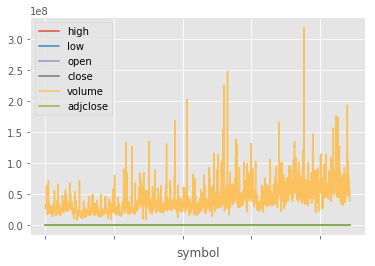

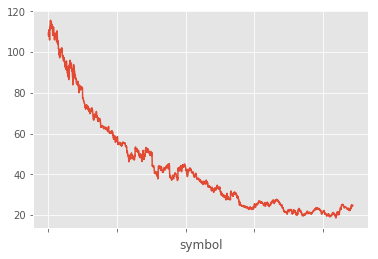

              open        high
symbol                        
MSFT    107.769997  108.334297
MSFT    109.320000  110.540001
MSFT    108.930000  110.860001
MSFT    110.099998  110.529999
MSFT    111.680000  111.809998


In [20]:
print(color.BOLD+"Check you stock of any of the following companies:"+color.END)
print(color.BOLD+"Company                 Type in"+color.END)
print("Microsoft Corp:         MSFT ")
print("Amazon.com Inc:         AMZN ")
print("Google, Inc:            GOOG")
print("Apple Computer Inc.:    AAPL ")
print("Coca-Cola Bottling Co.: COKE")
choice = input()
ydr = YahooDailyReader(choice)
df = ydr.read()
df.to_csv(choice)
df = pd.read_csv(choice)
print(df.head(6))
df = pd.read_csv(choice, parse_dates = True, index_col = 0)
df.plot()
plt.show()
df['adjclose'].plot()
plt.show()
print(df[['open', 'high']].head())

In [21]:
print("Mathew Holden")

Mathew Holden
